# Import data

## Import dependencies

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

## Reflect tables

In [2]:
# Prepare database file
engine = create_engine("sqlite:///hawaii.sqlite")

# Create Base class for Automap schema
Base = automap_base()

# Reflect schema from tables
Base.prepare(engine, reflect=True)

# View classes found by Automap
Base.classes.keys()

['measurement', 'station']

In [3]:
# Save reference to measurement table
Measurement = Base.classes.measurement

# Save reference to station table
Station = Base.classes.station

# Create session link
session = Session(engine)

## Inspect table data

In [4]:
# Inspect 'Measurement' columns and data in dictionary format
Measurement_dict = session.query(Measurement).first()
Measurement_dict.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fcb61cf3d90>,
 'id': 1,
 'date': '2010-01-01',
 'tobs': 65.0,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [5]:
# Inspect 'Station' columns and data in dictionary format
Station_dict = session.query(Station).first()
Station_dict.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fcb80a5b2e0>,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'station': 'USC00519397'}

# Exploratory climate analysis

## Precipitation data

### Query precipitation data

In [6]:
# Calculate date 1 year from last date in dataset
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Create empty list to store results of query
# Filter out all data that is older than 1 year from last record date
# Extract results to list
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

### Analyze precipitation data

In [7]:
# Save query results as Pandas DataFrame
df = pd.DataFrame(results, columns=['date','precipitation'])

In [8]:
# Describe data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Plot precipitation data

In [9]:
# Set index to "date" column & sort by date
df.set_index(df['date'], inplace=True)
df = df.sort_index()
print(df.to_string(index=False))

      date  precipitation
2016-08-23           0.00
2016-08-23            NaN
2016-08-23           1.79
2016-08-23           0.05
2016-08-23           0.15
2016-08-23           0.70
2016-08-23           0.02
2016-08-24           0.08
2016-08-24           2.15
2016-08-24           2.28
2016-08-24            NaN
2016-08-24           1.45
2016-08-24           1.22
2016-08-24           2.15
2016-08-25           0.08
2016-08-25           0.00
2016-08-25           0.21
2016-08-25           0.06
2016-08-25           0.00
2016-08-25           0.11
2016-08-25           0.08
2016-08-26           0.03
2016-08-26           0.01
2016-08-26           0.00
2016-08-26           0.04
2016-08-26           0.02
2016-08-26           0.00
2016-08-27           0.18
2016-08-27           0.12
2016-08-27           0.00
2016-08-27           0.00
2016-08-27           0.02
2016-08-27            NaN
2016-08-28           0.60
2016-08-28           0.14
2016-08-28           0.01
2016-08-28           0.14
2016-08-28  

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(-500.0, 0, '2017-05-27'),
  Text(0.0, 0, '2016-08-23'),
  Text(500.0, 0, '2016-11-09'),
  Text(1000.0, 0, '2017-01-28'),
  Text(1500.0, 0, '2017-04-18'),
  Text(2000.0, 0, '2017-07-10'),
  Text(2500.0, 0, '')])

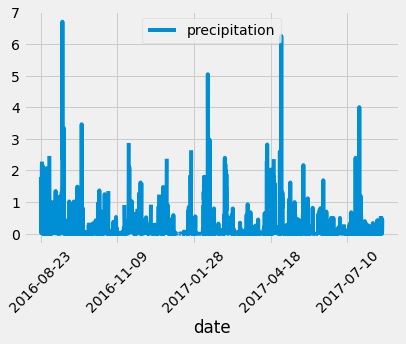

In [10]:
# Create plot
df.plot()
plt.xticks(rotation=45)

## Station data

### Query station data

In [11]:
# Count total number of stations & return results as list
session.query(func.count(Station.station)).all()

[(9,)]

In [12]:
# Group total measurements by station in descending order & return results as list
session.query(Measurement.station,\
    func.count(Measurement.station)).\
        group_by(Measurement.station).\
            order_by(func.count(Measurement.station).\
                desc()).\
                    all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

### Analyze data for most active station

In [13]:
# Calculate the minimum, maximum & average temperatures for most active station
# & return results as list
session.query(func.min(Measurement.tobs),\
    func.max(Measurement.tobs),\
        func.avg(Measurement.tobs)).\
            filter(Measurement.station == 'USC00519281').\
                all()

[(54.0, 85.0, 71.66378066378067)]

### Plot data for most active station

In [14]:
# Get last 1 year of temperature data for most active station & return results as list
results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
        filter(Measurement.date >= prev_year).all()
print(results)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [15]:
# Convert results to DataFrame
df = pd.DataFrame(results, columns=['tobs'])
print(df)

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


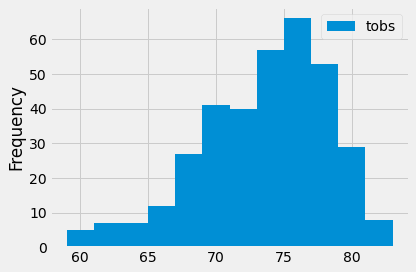

In [16]:
# Plot observations as histogram
df.plot.hist(bins=12)
plt.tight_layout()